# Data Scientist Nanodegree - Starbucks Capstone Challenge

# Udacity Instruction Section

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# Starbucks Capstone Project - Student Jupyter Notebook Section
#### Mike Durrant

## Introduction

### Overview

This analysis is conducted as the capstone project for my Udacity Data Scientist Nanodegree course.  It is accompanied by a technical blog post here (https://mikedurrantsheffield.medium.com/improving-starbucks-promotional-decisions-with-machine-learning-7fdf8d2f6aff).

Starbucks is one of the largest and best known chains of coffee shops in the world with a significant presence in many countries across the globe.  With millions of customers who are part of their membership and loyalty schemes they have enormous amounts of data at their disposal to learn about customer behaviour and drive smarter decision making throughout the business.

This project looks at a sample of data that was collected as part of an experiment looking at how various customers respond to different types of promotional offer.

### Problem Statement

For my capstone project I have decided to build a machine learning model that will help Starbucks employ predictive analytics in order to estimate how a particular customer will respond to a particular promotional offer.  This will be of enormous value to the business, and to their customers, as it means they would be able to make their promotional strategy more targeted.  

Starbucks benefits since they would not be wasting money contacting the wrong customers for offers, or sending offers to customers who actually would have purchased anyway (or who are actually put off by receiving promotional 'spam').

Customers benefit, in that they receive offers that they are actually likely to be interested in and glad to receive, rather than just a blanket sending of offers that are not relevant to many customers.

In summary, the problem statement I will answer with this machine learning model is - "Given details of a certain customer, a certain offer type and the channel of communication, can we predict with high accuracy whether that customer will respond favourably to the offer or not?"  Ultimately answering the question: "Should we send this offer to that customer?"

### Metrics

The classification metric I am focusing on for this project is accuracy.  Specifically the accuracy with which my model can predict the  binary response variable - "Offer Received Viewed and Completed".

This binary response variable requires a lot of data preprocessing, because it takes care to exclude various customer funnels that should not really be classed as a success in this analysis.  

For example, a customer may receive an offer, but never actually view that offer.  If they then go on to complete the offer, we can be clear that their behaviour was not driven by receiving the offer (since they did not know about it) and they would have purchased anyway.  

These customers are the ones who Starbucks really do not want to be sending offers to, since the discount that is provided to the 'would-have-purchased-anyway' is completely wasted margin for the business.  It is a nice surprise for the customer at the checkout, but Starbucks did not need to lose that margin.

There are many other features that would be interesting to look at from this data, including: Amount spent; Amount spent versus control group; Avg number of transactions versus control group.

However, as I am looking at a predictive analytics solution to the question "Should we send this offer to that customer?", I am focusing on the "Offer Received Viewed and Completed" metric as the key output variable.

In terms of assessing the accuracy and validity of the model that I build, I will use cross validation and a train test split to see how accurately the model will predict on new customer and offer data and to check for stability in the training data.

Other metrics that I could have used to assess the model performance include precision, recall and F1 score.  In a heavily unbalanced dataset, the accuracy measure is not the best one to use as it will be influenced by the weightings towards one of the quadrants of a confusion matrix.  While the dataset in this analysis is slightly imbalanced towards a negative reponse, it is not so heavily imbalanced as to make accuracy an inappropriate metric.

## Exploratory data analysis

In [1]:
# import all libraries required

import pandas as pd
import numpy as np
import math
import json
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier



In [2]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

## Portfolio exploration

In [3]:
portfolio   # 10 offer ids; channels will need breaking out into separate columns with 1 or 0

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


### Portfolio discussion
There are only 10 distinct offer ids in this experiment.  The channels applicable to each offer will need to be broken out into separate columns with 1 or 0 to flag which channel was in play.  There may be scope to group some of these offers (e.g. by offer type) - however, with only 10 on the list, it may be sensible to treat them separately for analysis.

## Profile exploration

In [4]:
profile  # 17,000 customer profiles - need to check for duplicates; check for normal distribution on age and income; check nans

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [5]:
# Check for duplicates in the id column
profile['id'].duplicated().sum()

0

### Profile duplicates discussion
There are no duplicates in the customer profile id column.  It is possible that a customer could be on this list twice if they signed up on separate occasions (perhaps with a different email account).  However, with the information provided we could not accurately identify those types of duplicates. Further data, such as name, street address, postcode (zip code), email address, telephone number, could be used to carry out a more thorough de-duplication process.  This information would need to be treated with additional security measures as it would constitute PII (Personally Identifiable Information) and would likely be affected by local legal frameworks e.g. European GDPR.

In [6]:
# What values are present in the data for gender?
profile['gender'].unique()

array([None, 'F', 'M', 'O'], dtype=object)

In [7]:
# Frequency of each gender value - excl NaNs
gender_counts = profile['gender'].value_counts()
gender_counts

M    8484
F    6129
O     212
Name: gender, dtype: int64

In [8]:
# Count of NaNs
gender_nans_count = profile['gender'].isna().sum()
gender_nans_count

2175

In [9]:
# Check this covers the full 17,000 rows --- it does.
gender_counts.sum() + gender_nans_count

17000

### Gender discussion
Gender will likely be split out using one hot encoding later into three or four columns.  We will need to decide whether to drop NaNs or to keep them as a further one hot encoded field ('not providing gender' may yield a useful feature in itself).

## Age exploration

In [10]:
# Check value counts of ages
profile['age'].value_counts()

118    2175
58      408
53      372
51      363
54      359
       ... 
100      12
96        8
98        5
99        5
101       5
Name: age, Length: 85, dtype: int64

(array([ 205.,  275.,  257.,  275.,  296.,  266.,  244.,  291.,  265.,
         372.,  354.,  391.,  442.,  423.,  444.,  609.,  647.,  723.,
         709.,  695.,  767.,  642.,  656.,  591.,  601.,  501.,  482.,
         400.,  352.,  296.,  252.,  234.,  207.,  153.,  120.,  117.,
          99.,   69.,   55.,   21.,   10.,   17.,    0.,    0.,    0.,
           0.,    0.,    0.,    0., 2175.]),
 array([ 18.,  20.,  22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,
         40.,  42.,  44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,
         62.,  64.,  66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,
         84.,  86.,  88.,  90.,  92.,  94.,  96.,  98., 100., 102., 104.,
        106., 108., 110., 112., 114., 116., 118.]),
 <a list of 50 Patch objects>)

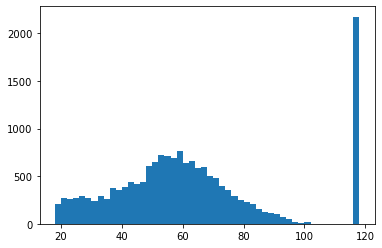

In [11]:
# Check for distribution of ages
plt.hist(profile['age'], bins=50)      # clear outlier at age 118 with 2,175 customers - these will need to be ignored

In [12]:
# Check for NaNs in ages
profile['age'].isna().sum()  # there are no NaNs

0

In [13]:
# What is the minimum age in the dataset
profile['age'].min()

18

### Age discussion
Presumably date of birth is a mandatory input field, but the "118 year olds", of which there are 2,175, left the field blank and it defaulted to 01/01/1900 for D.O.B.  In our modelling we will need to make these users NaNs which can either be excluded from a model, or included in case they are a useful feature in themselves (e.g. customers who choose not to give their date of birth may respond in a particular way to promotions as well).

Otherwise age seems to have a reasonably sensible distribution.  The minimum age is 18.  Is this the minimum age for signing up for an account?  Also of note, the frequency is highest in the 50 - 60 age category and is then almost normally distributed, although there is a noticeably higher frequency on the left side (younger customers) compared to the right side where it drops away quite steeply.  With access to additional data it would be advisable to compare this distribution with that of the overall population of Starbucks customers to confirm that the sample in this experiment is in line and not suffering from sampling bias.

## Income exploration

c:\users\mike_\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\mike_\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 939.,  792.,  958.,  749., 1145., 1089., 1279.,  931., 1158.,
        1187.,  881.,  554.,  718.,  497.,  620.,  370.,  276.,  222.,
         257.,  203.]),
 array([ 30000.,  34500.,  39000.,  43500.,  48000.,  52500.,  57000.,
         61500.,  66000.,  70500.,  75000.,  79500.,  84000.,  88500.,
         93000.,  97500., 102000., 106500., 111000., 115500., 120000.]),
 <a list of 20 Patch objects>)

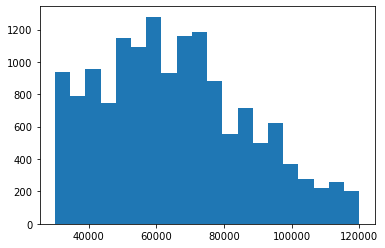

In [14]:
# Check for distribution of incomes
plt.hist(profile['income'], bins=20)     # run time warning appearing due to nans - histogram visualisation still useful

In [15]:
# Check for income NaNs
profile['income'].isna().sum()     

# Interestingly this is the same number exactly as the "118 year old" customers and the 'None' gender customers.

2175

In [16]:
# Are they the same 2,175 customers?
missing_age = profile[profile['age'] == 118]['id']
missing_income = profile[profile['income'].isna() == True]['id']

np.intersect1d(missing_age, missing_income).shape

# They are the exact same customers in both lists

(2175,)

In [17]:
# Also check the missing gender customers
missing_gender = profile[profile['gender'].isna() == True]['id']

np.intersect1d(missing_age, missing_gender).shape

# Again, they are the exact same customers as in missing_gender

(2175,)

In [18]:
# View "118 year old" customer rows to show income is also NaN and gender is None
profile[profile['age'] == 118]

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...
16980,None,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,None,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,None,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,None,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


### Income discussion
We have shown using a numpy 1d intersect that the list of 2,175 customers with missing income and age showing as 118 are the exact same customers for whom the income column is a NaN.  This is also the exact same list of customers who are showing 'None' for gender.

Apart from this element, the remaining income values appear to have a fairly sensible distribution.


## Membership duration exploration

In [19]:
# Convert column to datetime
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], yearfirst=True, format='%Y%m%d')

(array([  76.,   71.,   67.,   51.,   78.,   71.,   71.,   66.,   83.,
          71.,   66.,   67.,   68.,   61.,   64.,   83.,   66.,   74.,
          71.,   68.,  336.,  346.,  316.,  330.,  330.,  352.,  374.,
         358.,  369.,  342.,  378.,  314.,  348.,  324.,  351.,  360.,
         350.,  338.,  345.,  355., 1041., 1041., 1007., 1075.,  971.,
         738.,  681.,  728.,  700.,  709.]),
 array([735078.  , 735114.46, 735150.92, 735187.38, 735223.84, 735260.3 ,
        735296.76, 735333.22, 735369.68, 735406.14, 735442.6 , 735479.06,
        735515.52, 735551.98, 735588.44, 735624.9 , 735661.36, 735697.82,
        735734.28, 735770.74, 735807.2 , 735843.66, 735880.12, 735916.58,
        735953.04, 735989.5 , 736025.96, 736062.42, 736098.88, 736135.34,
        736171.8 , 736208.26, 736244.72, 736281.18, 736317.64, 736354.1 ,
        736390.56, 736427.02, 736463.48, 736499.94, 736536.4 , 736572.86,
        736609.32, 736645.78, 736682.24, 736718.7 , 736755.16, 736791.62,
        

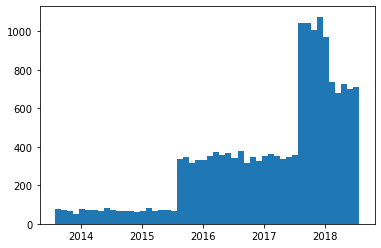

In [20]:
# Check the distribution of membership start dates
plt.hist(profile['became_member_on'], bins=50)

### Membership start date discussion
There is an interesting stepped pattern observed in the histogram above showing membership start dates.  There are four clear groupings from the distribution of membership start dates:
* 2014 to 2015 - low frequency of customers in this sample of 17,000
* 2016 to 2017 - a fairly large step up in frequency of customers appearing in this sample
* late 2017/early 2018 - a highly significant step up with the highest frequency time periods in this study
* late 2018 - a drop down from the peak, but still a high proportion in this sample

The overall pattern is perhaps not a surprise - the 2017 and 2018 cohort were more recent customers at the time of this study and are likely to be more engaged versus the much older cohorts because, over time, there will have been attrition of older customers, leaving fewer still engaged.  Furthermore, the lower incidence of customers with very recent start dates (at the time of the study), is also expected, as the brand new customer group have not yet had time to become fully engaged.  However, what is noteworthy is the fact that this pattern appears in clear steps, rather than in a smooth curve over time.

This may be showing us significant events in the past where there was a sudden uplift in the level of customer acquisition - perhaps through major sign up events or promotions.  It will be important to validate this stepped pattern against the larger population of all customers - to ensure that this is not a sampling bias or sampling error and confirm that it is in fact representative of the whole population.

## Transcript exploration

In [21]:
transcript   # 306,534 rows of transcript data split into different event types

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


The dict in the value column will need to be split out to gather useful data for modelling.  The time represents hours since the start of the experiment.  714 hours relates to nearly 30 days overall.

In [22]:
# What are the different event types in the dataset
transcript['event'].unique()     # 4 types of event in the transcript

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [23]:
# How frequently does each event type occur
transcript['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [24]:
# View sample of one person
one_customer_sample = transcript[transcript['person'] == '78afa995795e4d85b5d9ceeca43f5fef' ]
one_customer_sample

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
15561,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},6
47582,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 19.89},132
47583,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,132
49502,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 17.78},144
53176,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},168
85291,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},216
87134,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 19.67},222
92104,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 29.72},240
141566,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 23.93},378


## Key Exploration Headlines
* 10 distinct offers
* 17,000 customer profiles
* circa 300,000 transcript lines to analyse
    * circa 140,000 transactions
    * circa 76,000 offers received
    * circa 58,000 offers viewed
    * circa 34,000 offers completed
    * nearly 30 days of transcript data from the start of the experiment

### Modelling checklist
* Replace age 118 with NaNs
* Break out offer channels (e.g. email, mobile, social etc.)
* Break out event types
* Break out transcript value dict column

# Data Preprocessing

In [25]:
# Steps needed:

# Clean profile dataframe (make age 118 into NaN; make gender None into NaN)  DONE

# One Hot encode the gender column into four new columns in the profile dataframe   DONE

# Explode out the one hot encoded channels on the portfolio dataframe   DONE

# Split the transcript dataframe into four fact tables (different transaction types)  DONE

# Explode out the values dict in each of the four new fact tables (to give the offer id or the amount)  DONE

# Create df dataset for decision tree or randomforest classifier (predict whether a customer will respond to an offer) DONE


### Clean and preprocess profile dataframe

In [26]:
# Make age 118 and gender None display as NaN, consistent with income - keep NaNs for now - can drop in model dataset if needed
profile['age'].replace(118, np.nan, inplace=True)
profile['gender'].fillna(value=np.nan, inplace=True)
profile

,gender,age,id,became_member_on,income
0,NaN,NaN,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
2,NaN,NaN,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
4,NaN,NaN,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN
...,...,...,...,...,...
16995,F,45.0,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0
16996,M,61.0,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0
16997,M,49.0,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0
16998,F,83.0,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0


In [27]:
# One hot encode the gender categories - inluding dummy for nan
one_hot = pd.get_dummies(profile['gender'], dummy_na=True)
profile = profile.join(one_hot)

In [28]:
# Rename columns to be useful later on
profile.rename({'F':'gender_F','M':'gender_M','O':'gender_O'}, axis=1, inplace=True)
profile.columns = profile.columns.fillna('gender_NaN')

In [29]:
# Find max date for became member on - in order to set 'base date for membership duration'
latest_member_date = profile['became_member_on'].max()

In [30]:
# Create new column for membership duration
profile['days_as_member'] = latest_member_date - profile['became_member_on']

In [31]:
# Convert type from datetime to numeric for later modelling
profile['days_as_member'] = pd.to_numeric(profile['days_as_member'].dt.days) + 7    

# Add 7 was to ensure latest member has some days of membership (e.g. this analysis may have taken place 7 days after)

In [32]:
# Create bins for days as member
profile['days_as_member_bins'] = pd.cut(profile['days_as_member'], bins=5)

In [33]:
# One hot encode the days as member bins - inluding dummy for nan
one_hot = pd.get_dummies(profile['days_as_member_bins'], dummy_na=True, prefix='member_days')
profile = profile.join(one_hot)

In [34]:
# Create bins for income
profile['income_bins'] = pd.cut(profile['income'], bins=5)

In [35]:
# One hot encode the income bins - inluding dummy for nan
one_hot = pd.get_dummies(profile['income_bins'], dummy_na=True, prefix='income')
profile = profile.join(one_hot)

In [36]:
profile

,gender,age,id,became_member_on,income,gender_F,gender_M,gender_O,gender_NaN,days_as_member,...,"member_days_(1100.8, 1465.4]","member_days_(1465.4, 1830.0]",member_days_nan,income_bins,"income_(29910.0, 48000.0]","income_(48000.0, 66000.0]","income_(66000.0, 84000.0]","income_(84000.0, 102000.0]","income_(102000.0, 120000.0]",income_nan
0,NaN,NaN,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,0,0,0,1,536,...,0,0,0,NaN,0,0,0,0,0,1
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,1,0,0,0,383,...,0,0,0,"(102000.0, 120000.0]",0,0,0,0,1,0
2,NaN,NaN,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,0,0,0,1,21,...,0,0,0,NaN,0,0,0,0,0,1
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,1,0,0,0,450,...,0,0,0,"(84000.0, 102000.0]",0,0,0,1,0,0
4,NaN,NaN,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,0,0,0,1,363,...,0,0,0,NaN,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,F,45.0,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0,1,0,0,0,59,...,0,0,0,"(48000.0, 66000.0]",0,1,0,0,0,0
16996,M,61.0,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0,0,1,0,0,20,...,0,0,0,"(66000.0, 84000.0]",0,0,1,0,0,0
16997,M,49.0,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0,0,1,0,0,553,...,0,0,0,"(66000.0, 84000.0]",0,0,1,0,0,0
16998,F,83.0,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0,1,0,0,0,878,...,0,0,0,"(48000.0, 66000.0]",0,1,0,0,0,0


### Clean and preprocess portfolio dataframe

In [37]:
# One hot encode from the list items - channels of offer communication
portfolio = portfolio.join(pd.get_dummies(pd.DataFrame(portfolio['channels'].values.tolist()).stack()).astype(int).sum(level=0))


### credit to reference: https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list

In [38]:
# Rename columns to be useful later on
portfolio.rename({'email':'channel_email',
                  'mobile':'channel_mobile',
                  'social':'channel_social',
                  'web':'channel_web'}, axis=1, inplace=True)

In [39]:
# One hot encode the offer_type categories
one_hot = pd.get_dummies(portfolio['offer_type'])
portfolio = portfolio.join(one_hot)

In [40]:
# Rename columns to be useful later on
portfolio.rename({'bogo':'offer_type_bogo',
                  'informational':'offer_type_informational',
                  'discount':'offer_type_discount',
                  'reward':'offer_reward',
                 'difficulty': 'offer_difficulty',
                 'duration':'offer_duration'}, axis=1, inplace=True)

### Split transcript dataframe into four fact table dataframes (different event types)

In [41]:
# create four separate fact tables (dataframes) from the transcript
fact_offer_received_df = transcript[transcript['event'] == 'offer received']
fact_offer_viewed_df = transcript[transcript['event'] == 'offer viewed']
fact_offer_completed_df = transcript[transcript['event'] == 'offer completed']
fact_transactions_df = transcript[transcript['event'] == 'transaction']


In [42]:
# Create temporary dataframe to extract values from the dicts for offer received fact table
values_split = pd.DataFrame(fact_offer_received_df['value'].values.tolist(), index=fact_offer_received_df.index)

# Append this column to the fact table dataframe
fact_offer_received_df = pd.concat([fact_offer_received_df, values_split], axis=1)


In [43]:
# Create temporary dataframe to extract values from the dicts for offer viewed fact table
values_split = pd.DataFrame(fact_offer_viewed_df['value'].values.tolist(), index=fact_offer_viewed_df.index)

# Append this column to the fact table dataframe
fact_offer_viewed_df = pd.concat([fact_offer_viewed_df, values_split], axis=1)

In [44]:
# Create temporary dataframe to extract values from the dicts for offer completed fact table
values_split = pd.DataFrame(fact_offer_completed_df['value'].values.tolist(), index=fact_offer_completed_df.index)

# Append this column to the fact table dataframe
fact_offer_completed_df = pd.concat([fact_offer_completed_df, values_split], axis=1)

# Rename the offer_id column as offer id in line with other two fact tables
fact_offer_completed_df.rename({'offer_id':'offer id'}, axis=1, inplace=True)

In [45]:
# Create temporary dataframe to extract values from the dicts for transactions fact table
values_split = pd.DataFrame(fact_transactions_df['value'].values.tolist(), index=fact_transactions_df.index)

# Append this column to the fact table dataframe
fact_transactions_df = pd.concat([fact_transactions_df, values_split], axis=1)

### Create model dataset

In [46]:
# Create responses dataframe with selected columns from offer received fact table as start point
responses_df = fact_offer_received_df[['person', 'event', 'time', 'offer id']]

In [47]:
# Merge with portfolio to bring in the offer features for each row - check row count still 76,277
responses_df = responses_df.merge(portfolio, left_on='offer id', right_on='id')

In [48]:
# Merge with profile to bring in the customer features for each row - check row count still 76,277
responses_df = responses_df.merge(profile, left_on='person', right_on='id')
responses_df.shape

(76277, 41)

In [49]:
# NaNs driven from the 2,175 profiles with missing data - to be dropped
responses_df.isna().sum()

person                             0
event                              0
time                               0
offer id                           0
offer_reward                       0
channels                           0
offer_difficulty                   0
offer_duration                     0
offer_type                         0
id_x                               0
channel_email                      0
channel_mobile                     0
channel_social                     0
channel_web                        0
offer_type_bogo                    0
offer_type_discount                0
offer_type_informational           0
gender                          9776
age                             9776
id_y                               0
became_member_on                   0
income                          9776
gender_F                           0
gender_M                           0
gender_O                           0
gender_NaN                         0
days_as_member                     0
d

In [50]:
# Drop the NaN rows - leaves 66,501 in the dataset
responses_df = responses_df.dropna(axis=0)
responses_df.shape

(66501, 41)

In [51]:
# Filter out unexpired offers

# create a column to hold the expiry time for each offer receivedj
responses_df['offer_expiry_time'] = responses_df['time'] + (responses_df['offer_duration'] * 24)

# Max time for the experiment (i.e. the final time in the transcript) is 714 - filter out any expiries after this time
responses_df = responses_df[responses_df['offer_expiry_time'] <= 714]

In [52]:
# This leaves 57,561 offers in the dataset that had enough time to be completed within the experiment time frame
responses_df.shape

(57561, 42)

In [53]:
# Build function to work out the offer view time for each person/offer_id/time event - offer view must be after offer received

def find_offer_viewed_time(person, offer_id, time):
    """
    INPUT:
        person - person id
        offer_id - offer id
        time - time (in hours since start of experiment)
        
    OUTPUT:
        result - a single integer to show the time when and offer was viewed or NaN if not viewed
        NB - this also makes sure the time viewed is not prior to the time received
        
    
    """
    result = fact_offer_viewed_df[(fact_offer_viewed_df['person'] == person) 
                     &  (fact_offer_viewed_df['time'] >= time) 
                     & (fact_offer_viewed_df['offer id'] == offer_id)]['time'].min()
    return result

In [54]:
# WARNING - this cell takes a few minutes to run (between 5 - 10 mins)

# Apply function to create new column confirming the offer view time (this takes a few minutes to run)
responses_df['offer_viewed_time'] = responses_df[['person','offer id', 'time']].apply(lambda x: find_offer_viewed_time(*x), axis=1)

In [55]:
# Create offer viewed column - 1 or 0 response column (i.e. was a certain offer viewed after being received?)
responses_df['offer_viewed'] = [1 if x >= 0 else 0 for x in responses_df['offer_viewed_time']]

In [56]:
# Check how many of the 57,561 offers received were viewed
responses_df['offer_viewed'].sum()

44734

In [57]:
# Build function to work out offer completed time for each person/offer_id/timeviewed event - completion must be after view
def find_offer_completed_time(person, offer_id, time_viewed):
    """
    INPUT:
        person - person id
        offer_id - offer id
        time_viewed - time viewed (in hours since start of experiment)
        
    OUTPUT:
        result - a single integer to show the time when and offer was completed or NaN if not completed
        NB - this also makes sure the time completed is not prior to the time viewed
        
    
    """
    result = fact_offer_completed_df[(fact_offer_completed_df['person'] == person)
                                    & (fact_offer_completed_df['time'] >= time_viewed)
                                    & (fact_offer_completed_df['offer id'] == offer_id)]['time'].min()
    
    return result

In [58]:
# Test function - use this cell to test the function for any combination of person, offer id and time from transcript
find_offer_completed_time('3e6571afb8b242a09de76e353a2b3fc7', '4d5c57ea9a6940dd891ad53e9dbe8da0', 570)

nan

In [59]:
# WARNING - this cell takes a few minutes to run (between 5 - 10 mins) - consider an np.where approach if possible

# Apply function to create new column confirming the offer completed time (this takes a few minutes to run)
responses_df['offer_completed_time'] = responses_df[['person','offer id', 'time']].apply(lambda x: find_offer_completed_time(*x), axis=1)

In [60]:
# Create offer completed column - 1 or 0 - (i.e. was an offer completed after being viewed?)
responses_df['offer_completed'] = [1 if x >= 0 else 0 for x in responses_df['offer_completed_time']]

In [61]:
# Check how many offers were completed
responses_df['offer_completed'].sum()

28299

In [62]:
# Create final column for viewed then completed - including logic that completed must be after viewed
responses_df['offer_viewed_then_completed'] = np.where(
    (responses_df['offer_viewed_time'] > responses_df['offer_completed_time']) |
    (responses_df['offer_viewed'] == 0) | 
    (responses_df['offer_completed'] == 0), 
         0, 
         1)

In [63]:
# Check the shape still has 57,561 rows
responses_df.shape

(57561, 47)

In [64]:
# Review columns in the dataframe
responses_df.columns

Index(['person', 'event', 'time', 'offer id', 'offer_reward', 'channels',
       'offer_difficulty', 'offer_duration', 'offer_type', 'id_x',
       'channel_email', 'channel_mobile', 'channel_social', 'channel_web',
       'offer_type_bogo', 'offer_type_discount', 'offer_type_informational',
       'gender', 'age', 'id_y', 'became_member_on', 'income', 'gender_F',
       'gender_M', 'gender_O', 'gender_NaN', 'days_as_member',
       'days_as_member_bins', 'member_days_(5.177, 371.6]',
       'member_days_(371.6, 736.2]', 'member_days_(736.2, 1100.8]',
       'member_days_(1100.8, 1465.4]', 'member_days_(1465.4, 1830.0]',
       'member_days_nan', 'income_bins', 'income_(29910.0, 48000.0]',
       'income_(48000.0, 66000.0]', 'income_(66000.0, 84000.0]',
       'income_(84000.0, 102000.0]', 'income_(102000.0, 120000.0]',
       'income_nan', 'offer_expiry_time', 'offer_viewed_time', 'offer_viewed',
       'offer_completed_time', 'offer_completed',
       'offer_viewed_then_completed'],


In [65]:
# Create model ready dataframe - drop unnecessary columns
responses_df = responses_df[
            ['offer_reward',
             'offer_difficulty',
             'offer_duration',
             'channel_email',
             'channel_mobile',
             'channel_social',
             'channel_web',
             'offer_type_bogo',
             'offer_type_discount',
             'offer_type_informational',
             'age',
             'income',
             'gender_F',
             'gender_M',
             'gender_O',
             'gender_NaN',
             'member_days_(5.177, 371.6]',
             'member_days_(371.6, 736.2]', 
             'member_days_(736.2, 1100.8]',
             'member_days_(1100.8, 1465.4]', 
             'member_days_(1465.4, 1830.0]',
             'member_days_nan', 
             'income_(29910.0, 48000.0]',
             'income_(48000.0, 66000.0]', 
             'income_(66000.0, 84000.0]',
             'income_(84000.0, 102000.0]', 
             'income_(102000.0, 120000.0]',
             'income_nan',
             'offer_viewed_then_completed']
            ]

In [66]:
responses_df

,offer_reward,offer_difficulty,offer_duration,channel_email,channel_mobile,channel_social,channel_web,offer_type_bogo,offer_type_discount,offer_type_informational,...,"member_days_(1100.8, 1465.4]","member_days_(1465.4, 1830.0]",member_days_nan,"income_(29910.0, 48000.0]","income_(48000.0, 66000.0]","income_(66000.0, 84000.0]","income_(84000.0, 102000.0]","income_(102000.0, 120000.0]",income_nan,offer_viewed_then_completed
0,5,5,7,1,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,5,5,5,1,1,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,10,10,7,1,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,3,1,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,5,5,7,1,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76270,0,0,3,1,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
76271,0,0,3,1,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
76273,0,0,3,1,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
76274,0,0,3,1,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


# Modelling implementation and refinement

In [67]:
# Create X dataframe with all the features - remove the response variable
X = responses_df.drop(labels=['offer_viewed_then_completed'], axis=1)

In [68]:
# Check the shape of X
X.shape

(57561, 28)

In [69]:
# Create the y response series - only the response variable
y = responses_df['offer_viewed_then_completed']

In [70]:
# Check the shape of y
y.shape

(57561,)

In [71]:
# Originally I had split into three - train test and val - however not necessary as cross_val score does train - val split

# Only one train test split required
X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.2, random_state=42)


In [72]:
# Check shape of train test and val
print(X_train.shape, X_test.shape)

(46048, 28) (11513, 28)


## Using Decision Tree Classifier

In [73]:
# Instantiate model

# NB - had to remove member_since_date from the df as this was the wrong data type for the classifier

# Need to reengineer this feature in as a float declaring number of days membership duration - perhaps in buckets and one hot encoded


clf = DecisionTreeClassifier(random_state=42)


### Model evaluation and validation

In [74]:
# Find the cross validation score on X_train, y_train

# First attempt, no tuning or feature engineering, got to 0.70 
# Second attempt, no tuning; feature engineering to bin income and duration, got to 0.72
# Final model (lower down using RandomForest with parameter tuning) got to 0.75

cross_val_score(clf, X_train, y_train, cv=10).mean()

0.7222246387270287

In [75]:
# Assess importance by feature
clf.fit(X_train, y_train)
clf.feature_importances_

array([2.05672383e-01, 1.15764656e-02, 1.00057693e-02, 0.00000000e+00,
       2.98860102e-04, 5.10405362e-02, 4.21452387e-03, 1.20888050e-02,
       7.44337845e-03, 0.00000000e+00, 3.00408996e-01, 2.62672082e-01,
       1.17255474e-02, 1.83667821e-02, 3.44065560e-03, 0.00000000e+00,
       4.79783684e-02, 1.15193774e-02, 1.23314106e-02, 8.02799789e-03,
       8.56168205e-03, 0.00000000e+00, 1.46270939e-03, 4.11414303e-03,
       3.73804704e-03, 2.35532023e-03, 9.56159505e-04, 0.00000000e+00])

In [76]:
# Assess importance by feature using permutation importance
result = permutation_importance(clf, X_train, y_train, n_repeats=10)
result.importances_mean

array([0.20131385, 0.04457305, 0.03877041, 0.        , 0.00075573,
       0.1554378 , 0.00722507, 0.05674514, 0.0338082 , 0.        ,
       0.2529795 , 0.26657835, 0.0399127 , 0.08594293, 0.00232801,
       0.        , 0.16090384, 0.02159703, 0.01699314, 0.01461301,
       0.0140853 , 0.        , 0.00145935, 0.01654795, 0.0062652 ,
       0.0026038 , 0.00073619, 0.        ])

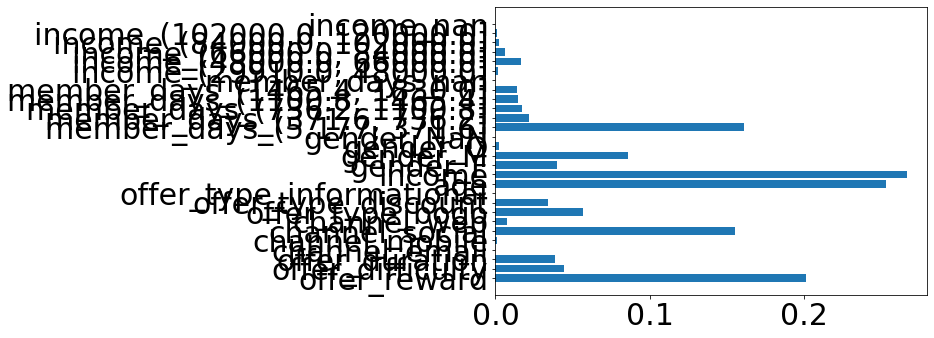

In [77]:
# Plot the importance by feature for Decision Tree Classifier
fig = plt.figure()
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams.update({'font.size': 30})
ax = fig.add_axes([0,0,1,1])
features = X.columns
importance = result.importances_mean
ax.barh(features,importance)
plt.show()

In [78]:
# Make predictions on test dataset
y_preds = clf.predict(X_test)

In [79]:
# Score predictions on test set (unseen)
clf.score(X_test, y_test)

0.7199687309997395

In [87]:
# show hyperparameters
clf.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')>

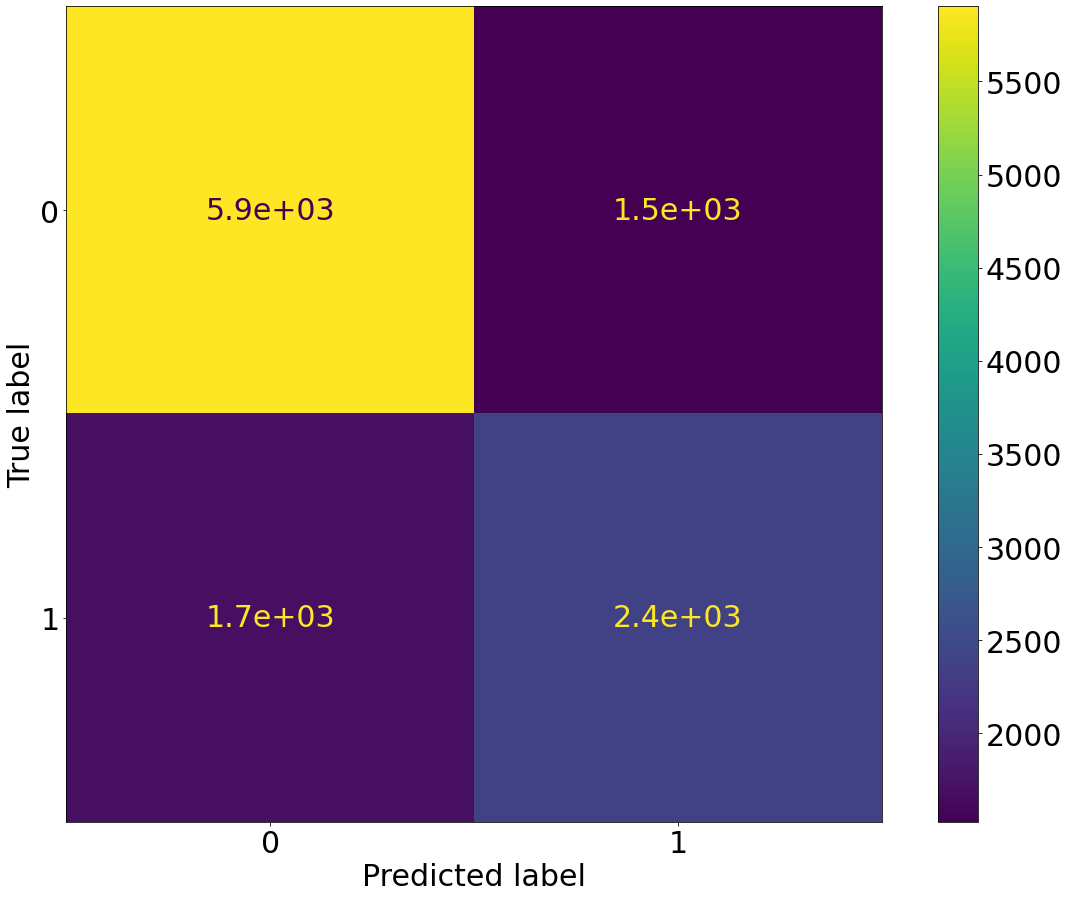

In [80]:
# Build confusion matrix to visualise tp, fp, tn, fn)
cm = confusion_matrix(y_test, y_preds, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=clf.classes_)
disp.plot() 

In [81]:
# View confusion matrix array
cm

array([[5903, 1526],
       [1698, 2386]], dtype=int64)

## Using RandomForestClassifier

In [94]:
# Instantiate classifier
clfRF = RandomForestClassifier(max_depth=5, min_samples_leaf=4, n_estimators=200, random_state=42)

### Evaluation and validation

In [100]:
# Find the cross validation score on X_train, y_train
cross_val_score(clfRF, X_train, y_train, cv=10)

array([0.75331162, 0.75808903, 0.74549403, 0.74766558, 0.7606949 ,
       0.75135722, 0.74549403, 0.75222584, 0.76172893, 0.75977411])

In [96]:
# Assess feature importance
clfRF.fit(X_train, y_train)
clfRF.feature_importances_

array([0.1663997 , 0.16704722, 0.14557946, 0.        , 0.01694954,
       0.10442144, 0.01673365, 0.02621546, 0.02856374, 0.15329831,
       0.00597253, 0.02295878, 0.0039895 , 0.00714876, 0.0001919 ,
       0.        , 0.07178612, 0.01887529, 0.02461818, 0.00071437,
       0.00098782, 0.        , 0.01427617, 0.0003034 , 0.00069364,
       0.00183459, 0.00044044, 0.        ])

In [97]:
# Assess feature importance using permuation importance
result = permutation_importance(clfRF, X_train, y_train, n_repeats=10)
result.importances_mean

array([1.58291348e-02, 1.47737144e-02, 1.52949097e-02, 0.00000000e+00,
       7.75277971e-04, 4.01190063e-02, 2.53865532e-03, 8.73002085e-04,
       7.10562891e-03, 1.40440410e-02, 1.22263725e-03, 2.92520848e-03,
       5.19023628e-04, 1.73080264e-03, 1.95448228e-04, 0.00000000e+00,
       2.39011466e-02, 2.04786310e-03, 4.47576442e-03, 5.21195274e-04,
       3.93068103e-04, 0.00000000e+00, 1.03153231e-03, 3.30090341e-04,
       4.08269632e-04, 3.25747047e-05, 1.10536831e-03, 0.00000000e+00])

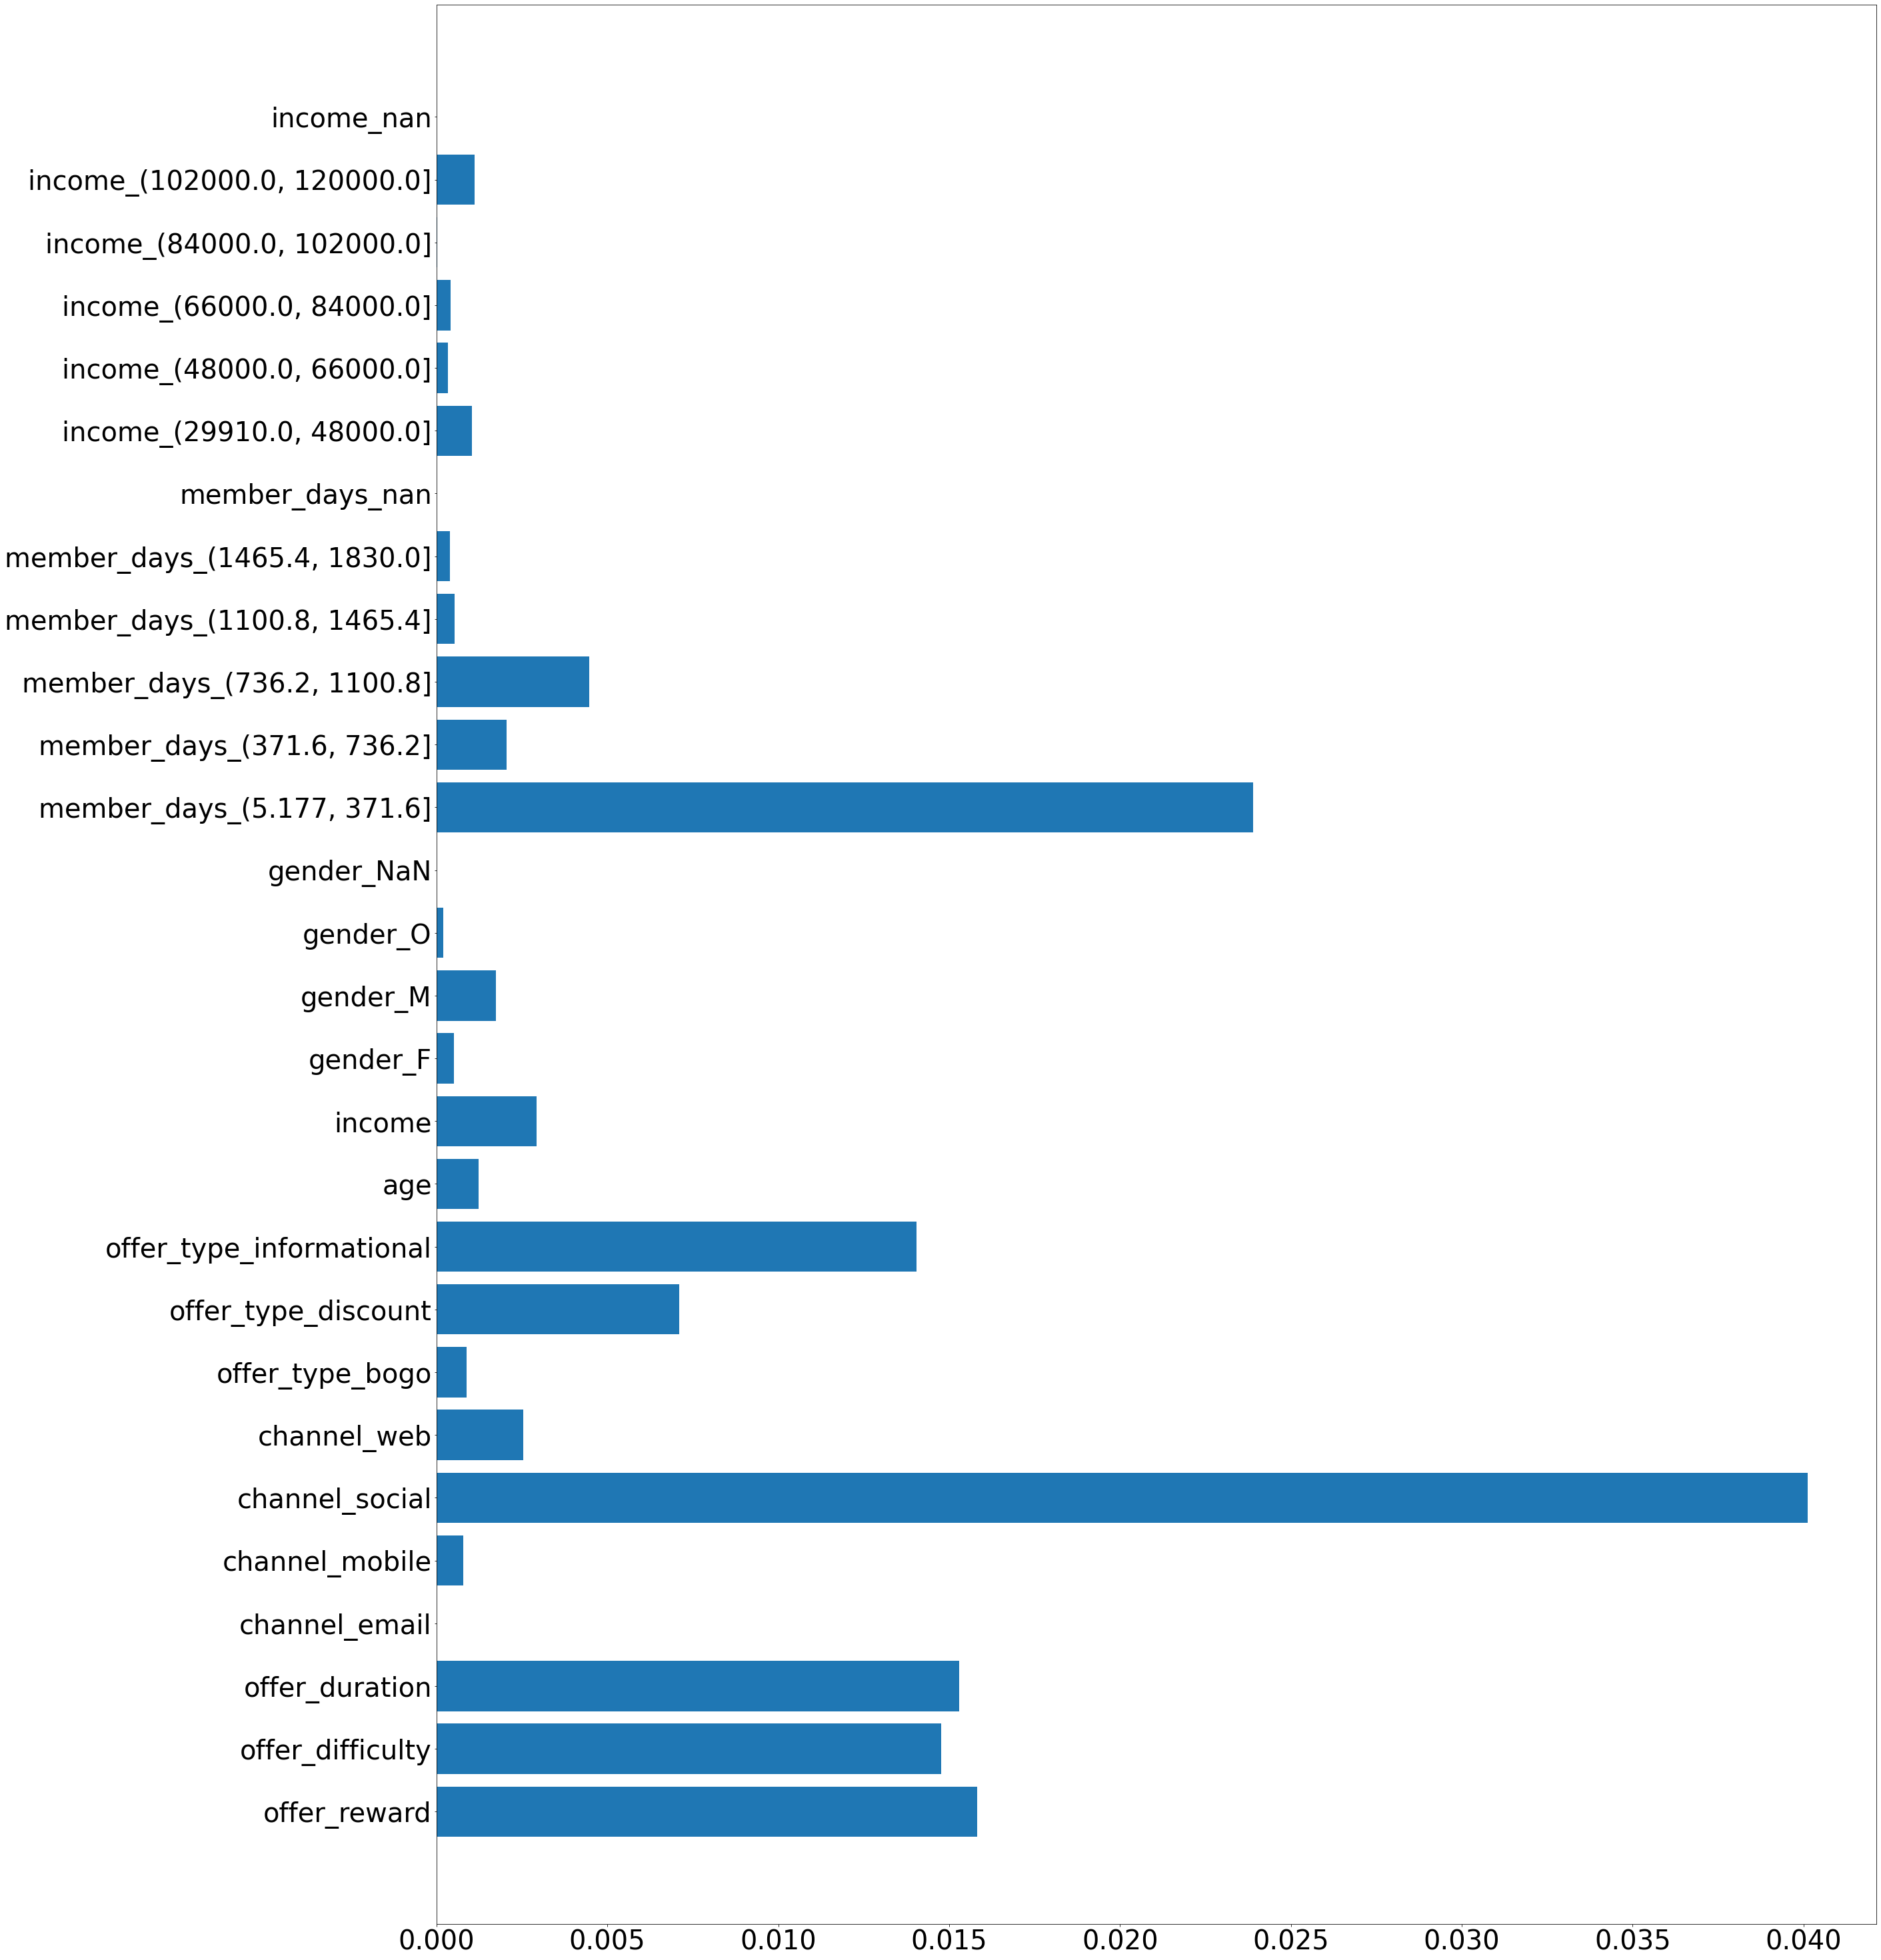

In [98]:
# Plot permutation importance to visualise features
fig = plt.figure()
plt.rcParams["figure.figsize"] = (30,40)
plt.rcParams.update({'font.size': 40})
ax = fig.add_axes([0,0,1,1])
features = X.columns
importance = result.importances_mean
ax.barh(features,importance)
plt.show()



In [99]:
# show hyperparameters
clfRF.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>

# Results

## Model evaluation, validation and justification

Initially a Decision Tree Classifier was used for the model.  This achieved a 0.70 accuracy at first and this was improved to 0.72 through refining of the features - notably through creating bins of some of the continuous features such as income.

A Random Forest Classifier was then used to apply a more ensemble technique for greater predictive capability.  Initially this yielded a 0.69 accuracy score, but this was refined through parameter tuning to achieve a 0.75 accuracy which is the best score achieved and is the final model for this project.  The key parameter that yielded this improvement was increasing the maximum depth level from 2 up to 5 to allow more branching.  We would not want to increase depth level too high for risk of overfitting our model.

An accuracy of 0.75, while not a perfect prediction rate, will at least provide Starbucks with more accuracy than they previously had when no machine learning model was applied to the decision around whether to send out offers.

Further validation could be achieved on an ongoing basis by implementing this algorithm in the next promotional period - but also holding back a control group through a clear experimental design process (the control group being where promo offers are selected at random, or using the old method).  The uptake % of promotions of the test group (with this algortitm) versus the control group would help to validate whether this algorithm performs better than the control - as long as the sample size is large enough for statistical significance.

In terms of the driving factors around the success metric - the permutation feature importance yielded some interesting results as shown in the bar charts, around which features had the greatest impact on the predictions from the model.  Income and age were strong features in driving model output, along with whether a member was in the newest member category, whether the channel of communication was social and what level of reward was attached to the offer.




# Conclusion

### Reflection

This Random Forest Classifier model has achieved what I set out to do in the problem statement, in that it provides a method for Starbucks to apply predicitve analytics to the question - "Should we send this offer to that customer?".  For each customer/offer combo - they would simply need to apply the clfRF.predict method and this would return a 1 or 0 to indicate whether or not that customer is expected to view and complete the offer.

This would have a signficant value adding impact to Starbucks - and could be tuned further to deliver some prescriptive analytics to determine exactly who to send offers and which offers to send them.  For example, we know from the feature importance array that offer_reward is a strong determiner of offer uptake - but, for each customer, a prescriptive model could optimise a strategy where customers are sent an offer with a reward that is 'just strong enough' for that particular customer.  Many customers may be enticed by a 5 dollar discount - yet in the past have been receiving 10 dollar discounts which is more than they need.  Furthermore, other customers may be getting turned off by receiving offers - and this algorithm would stop them being sent an offer in the first place.

I found the data preprocessing and preparation stages the most difficult part of this project.  This was due to the complexities in the experiment period around timings between offers received, viewed and completed, along with the nuances and many edge cases that were possible - e.g. a customer completing on an offer, even though they did not view it (therefore - that had to be classed as 'not a success' as far as Starbucks is concerned).

I also came across difficulties at the modelling stage with errors from fitting the Decision Tree Classifier.  This was the result of wrong data types (I still had the datetime object in the matrix for 'became_member_on').  I re-worked the upstream data preprocessing to remove this and replace it with a duration measure of how long a member had been with Starbucks.  This was a good solution for two reasons - first it enable the classifier to work, and secondly it ended up being a key feature in improving the model accuracy.

### Potential improvements to methodology and modelling

In terms of speed of performance, I would like to have spent more time on the two functions that slow down this whole workbook - namely, the functions "find_offer_viewed_time" and "find_offer_completed_time".  These are both operating on a df.apply basis which is effectively a 'for loop' and is rather slow to run through such a large dataframe.  Ideally I would like to investigate a vectorised solution to this lookup - perhaps using np.where.


Furthermore, this accuracy level might be improved in future through either exploring other machine learning models or in applying more detailed feature engineering and principle component analysis.

As a delivery and implementation mechanism, this machine learning model could be built into the Starbucks internal promotion and offer system through a DevOps strategy to lock in benefits on all future promotions.  Alternatively, it could be built as a web application for the promotions department to use as a validation tool before sending out future promotions - i.e. flagging on their proposed list which of the customers are not likely to respond or are likely to respond negatively to the offer.